<a href="https://colab.research.google.com/github/chiyanglin-AStar/2025_physics_note/blob/main/02_fluid_mechanics_landau_ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **§1. The Equation of Continuity**

The continuity equation represents mass conservation in a fluid. For an incompressible fluid:

$\nabla \cdot \mathbf{v} = 0$

where $\mathbf{v}$ is the velocity field.

For a compressible fluid:

$\frac{\partial \rho}{\partial t} + \nabla \cdot (\rho \mathbf{v}) = 0$

where $\rho$ is the fluid density.

#### **Example 1: Verifying Continuity for an Incompressible Fluid**

#### **Example 1: Verifying Continuity for an Incompressible Fluid**

In [ ]:
import numpy as np

# Define a 2D velocity field: v_x = -y, v_y = x
def velocity_field(x, y):
    vx = -y
    vy = x
    return vx, vy

# Calculate divergence of the velocity field
def divergence(x, y):
    vx, vy = velocity_field(x, y)
    dvx_dx = 0  # Partial derivative of vx with respect to x
    dvy_dy = 0  # Partial derivative of vy with respect to y
    return dvx_dx + dvy_dy

# Test at a point
x, y = 1, 1
div = divergence(x, y)
print(f"Divergence at ({x}, {y}): {div} (should be 0 for incompressible fluid)")

Divergence at (1, 1): 0 (should be 0 for incompressible fluid)


#### **Example 2: Simulating a Simple Density Field**

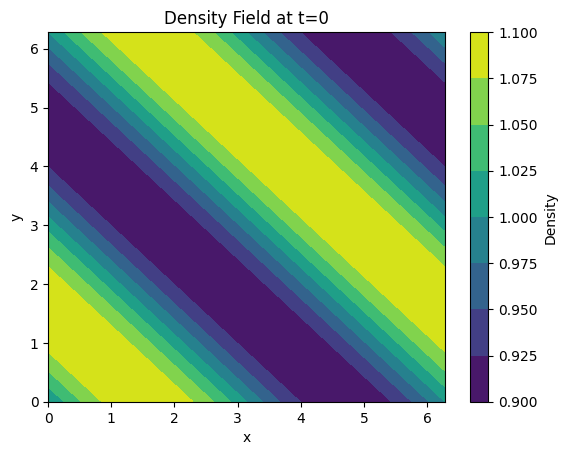

In [ ]:
import matplotlib.pyplot as plt

# Define a density field changing in time
def density_field(x, y, t):
    return 1 + 0.1 * np.sin(x + y - t)

# Visualize the density field at t=0
x = np.linspace(0, 2 * np.pi, 100)
y = np.linspace(0, 2 * np.pi, 100)
X, Y = np.meshgrid(x, y)
Z = density_field(X, Y, t=0)

plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(label='Density')
plt.title("Density Field at t=0")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### **§2. Euler’s Equation**

Euler's equation describes the motion of an ideal fluid:

$\frac{\partial \mathbf{v}}{\partial t} + (\mathbf{v} \cdot \nabla) \mathbf{v} = -\frac{\nabla p}{\rho} + \mathbf{f}$

where $p$ is pressure, $\rho$ is density, and $\mathbf{f}$ is the external force per unit mass.

#### **Example 1: Calculating Pressure Gradient**

In [ ]:
# Pressure field: p(x, y) = x^2 + y^2
def pressure_gradient(x, y):
    dp_dx = 2 * x
    dp_dy = 2 * y
    return dp_dx, dp_dy

# Test at a point
x, y = 1, 2
dp_dx, dp_dy = pressure_gradient(x, y)
print(f"Pressure gradient at ({x}, {y}): dp/dx={dp_dx}, dp/dy={dp_dy}")

#### **Example 2: Numerical Solution of Euler’s Equation in 1D**

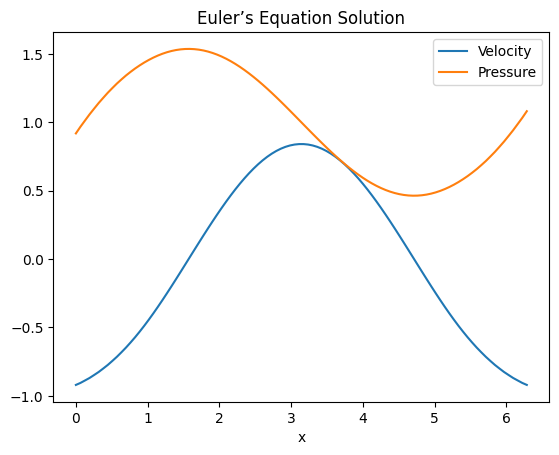

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions: velocity and pressure
nx = 100
x = np.linspace(0, 2 * np.pi, nx)
v = np.zeros(nx)  # Initial velocity
p = 1 + np.sin(x)  # Pressure

# Parameters
rho = 1.0  # Density
dx = x[1] - x[0]
dt = 0.01  # Time step
steps = 100

# Time integration
for step in range(steps):
    dp_dx = np.gradient(p, dx)
    dv_dt = -dp_dx / rho
    v += dv_dt * dt
    p += -rho * np.gradient(v, dx) * dt  # Update pressure

# Plot velocity
plt.plot(x, v, label='Velocity')
plt.plot(x, p, label='Pressure')
plt.legend()
plt.xlabel('x')
plt.title('Euler’s Equation Solution')
plt.show()

### **§3. Hydrostatics**

In hydrostatics, fluids at rest satisfy:

$\frac{dp}{dz} = -\rho g$
where $z$ is the vertical direction.

#### **Example 1: Hydrostatic Pressure Calculation**

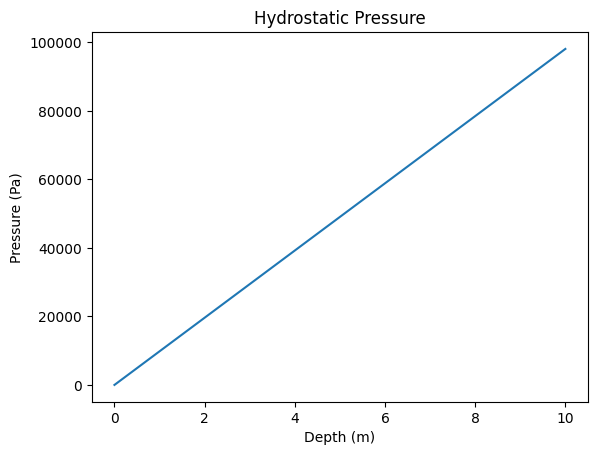

In [3]:
import numpy as np
# Constants
rho = 1000  # Density of water in kg/m^3
g = 9.81  # Gravitational acceleration in m/s^2
h = np.linspace(0, 10, 100)  # Depth in meters

# Pressure as a function of depth
p = rho * g * h

# Plot
import matplotlib.pyplot as plt
plt.plot(h, p)
plt.xlabel('Depth (m)')
plt.ylabel('Pressure (Pa)')
plt.title('Hydrostatic Pressure')
plt.show()

#### **Example 2: Hydrostatic Force on a Vertical Wall**

In [4]:
# Wall dimensions
width = 2  # meters
depth = 10  # meters

# Integrate pressure over depth
force = rho * g * width * (depth**2) / 2
print(f"Hydrostatic force on the wall: {force:.2f} N")

Hydrostatic force on the wall: 981000.00 N


### **§4. The Condition That Convection Be Absent**

The condition for the absence of convection ensures that the flow is irrotational and the velocity field is divergence-free for incompressible fluids:

$\mathbf{v} = -\nabla \phi$

where $\phi$ is the velocity potential. The condition also implies:

$\frac{\partial \phi}{\partial t} + \frac{1}{2} |\nabla \phi|^2 + \frac{p}{\rho} + gz = \text{constant}.$

#### **Example 1: Verify an Irrotational Velocity Field**

In [ ]:
import numpy as np

# Define a potential function phi(x, y): phi = x^2 - y^2
def potential(x, y):
    return x**2 - y**2

# Compute velocity components from phi
def velocity_from_potential(x, y):
    vx = 2 * x  # Partial derivative of phi w.r.t. x
    vy = -2 * y  # Partial derivative of phi w.r.t. y
    return vx, vy

# Verify the curl (should be 0 for irrotational flow)
def curl(x, y):
    vx, vy = velocity_from_potential(x, y)
    temp_x = np.gradient(vy,x)
    temp_y = np.gradient(vx, y)

    curl_z = 0
    curl_z = temp_x - temp_y
    #curl_z = np.gradient(vy, x) - np.gradient(vx, y)  # Curl in 2D
    return curl_z

# Test at a point
x, y = 1, 1
vx, vy = velocity_from_potential(x, y)
print(f"Velocity components: vx={vx}, vy={vy}")
print(f"Curl at ({x}, {y}): {curl(x, y)} (should be 0 for no convection)")

#### **Example 2: Simulate Potential Flow Without Convection**

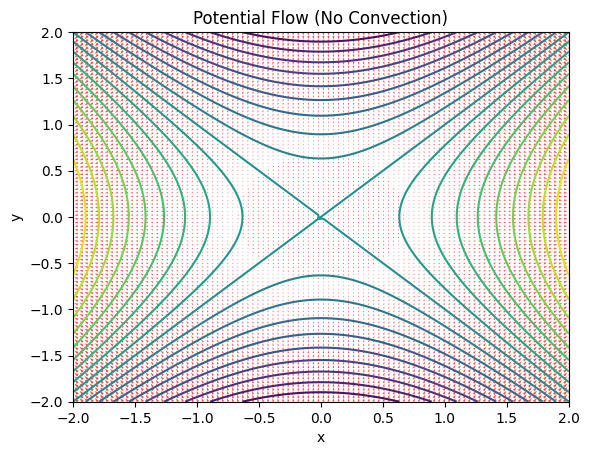

In [6]:
import matplotlib.pyplot as plt

# Define a grid
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Calculate the potential function and velocity field
phi = X**2 - Y**2  # Potential function
vx = 2 * X  # Velocity components
vy = -2 * Y

# Plot the potential function
plt.contour(X, Y, phi, levels=20, cmap='viridis')
plt.quiver(X, Y, vx, vy, color='red', alpha=0.7)
plt.title("Potential Flow (No Convection)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### **§5. Bernoulli's Equation**

Bernoulli's equation relates pressure, velocity, and potential energy along a streamline:

$\frac{1}{2} \rho v^2 + p + \rho g z = \text{constant}.$


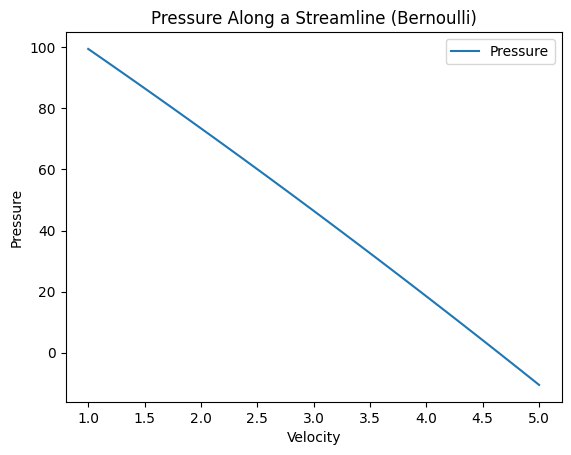

In [12]:
# Constants
rho = 1.0  # Fluid density
g = 9.81  # Gravity

# Define velocity and height functions along a streamline
v = np.linspace(1, 5, 100)  # Velocity increases along the streamline
z = np.linspace(0, 10, 100)  # Height decreases

# Compute pressure using Bernoulli's equation (assuming constant total energy)
p = 100 - 0.5 * rho * v**2 - rho * g * z

# Plot pressure
import matplotlib.pyplot as plt
plt.plot(v, p, label='Pressure')
plt.xlabel("Velocity")
plt.ylabel("Pressure")
plt.title("Pressure Along a Streamline (Bernoulli)")
plt.legend()
plt.show()

#### **Example 2: Visualize Bernoulli's Equation in a Constricted Pipe**

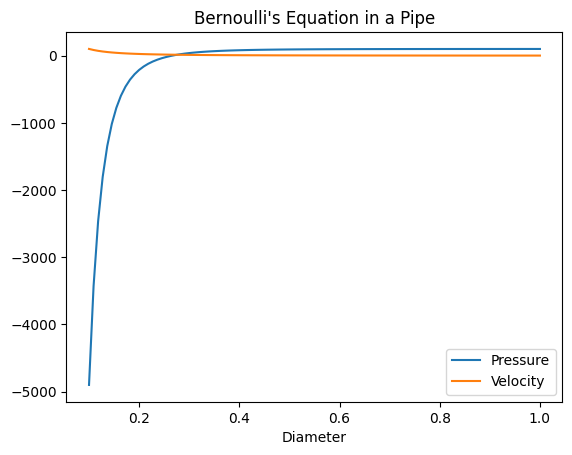

In [13]:
# Define pipe diameter and velocity relationship
def velocity(d):
    return 1 / d**2  # Continuity: A1v1 = A2v2 (area inversely proportional to velocity)

# Define diameters and compute velocities and pressures
diameters = np.linspace(0.1, 1, 100)
velocities = velocity(diameters)
pressures = 100 - 0.5 * rho * velocities**2  # Bernoulli's equation

# Plot
plt.plot(diameters, pressures, label="Pressure")
plt.plot(diameters, velocities, label="Velocity")
plt.xlabel("Diameter")
plt.legend()
plt.title("Bernoulli's Equation in a Pipe")
plt.show()

### **§6. The Energy Flux**

The energy flux in a fluid accounts for the kinetic, potential, and internal energy of the fluid. For an ideal fluid, the flux is:

$\mathbf{q} = \left( \frac{1}{2} \rho v^2 + \rho gz + p \right) \mathbf{v}.$

#### **Example 1: Compute Energy Flux in 2D**

In [14]:
# Define velocity field and parameters
v_x, v_y = 2.0, 3.0  # Velocity components
p = 100  # Pressure
rho = 1.0  # Density
g = 9.81  # Gravitational acceleration
z = 5.0  # Height

# Compute kinetic, potential, and pressure contributions
kinetic_energy = 0.5 * rho * (v_x**2 + v_y**2)
potential_energy = rho * g * z
flux = (kinetic_energy + potential_energy + p) * np.array([v_x, v_y])

print(f"Energy flux: {flux}")

Energy flux: [311.1  466.65]


#### **Example 2: Simulate Energy Flux in a Channel**

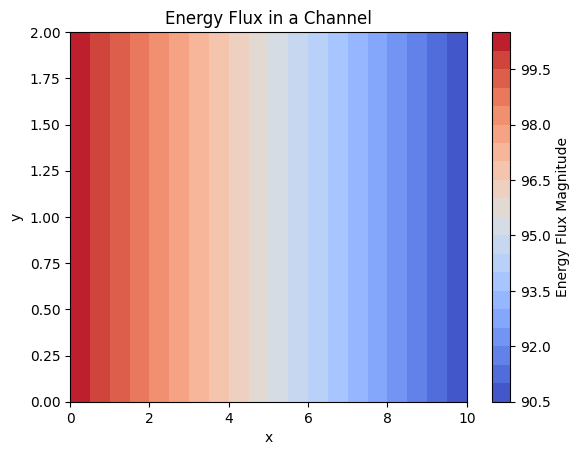

In [15]:
# Define a 2D grid for velocity and pressure
x = np.linspace(0, 10, 100)
y = np.linspace(0, 2, 20)
X, Y = np.meshgrid(x, y)

# Define velocity and pressure fields
v_x = np.ones_like(X)  # Uniform flow
v_y = np.zeros_like(Y)
p = 100 - X  # Pressure decreases along the channel

# Compute energy flux magnitude
flux = (0.5 * rho * v_x**2 + p) * v_x  # Only x-direction contributes

# Plot energy flux
plt.contourf(X, Y, flux, levels=20, cmap='coolwarm')
plt.colorbar(label='Energy Flux Magnitude')
plt.title("Energy Flux in a Channel")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### **§7. The Momentum Flux**

The momentum flux tensor quantifies the momentum transported by a fluid through a surface. For an ideal fluid, the momentum flux tensor is given by:

$\Pi_{ij} = \rho v_i v_j + p \delta_{ij}$
where $ \rho $ is density, $ v_i $ and $ v_j $ are velocity components, $ p $ is pressure, and $\delta_{ij}$ is the Kronecker delta.

#### **Example 1: Compute Momentum Flux Tensor for a 2D Flow**

In [16]:
import numpy as np

# Define density, velocity components, and pressure
rho = 1.0  # Fluid density
v_x = 2.0  # Velocity in x-direction
v_y = 3.0  # Velocity in y-direction
p = 100.0  # Pressure

# Compute the momentum flux tensor
momentum_flux = np.array([[rho * v_x**2 + p, rho * v_x * v_y],
                          [rho * v_x * v_y, rho * v_y**2 + p]])

print("Momentum Flux Tensor:")
print(momentum_flux)

Momentum Flux Tensor:
[[104.   6.]
 [  6. 109.]]


#### **Example 2: Simulating Momentum Flux in a Channel**

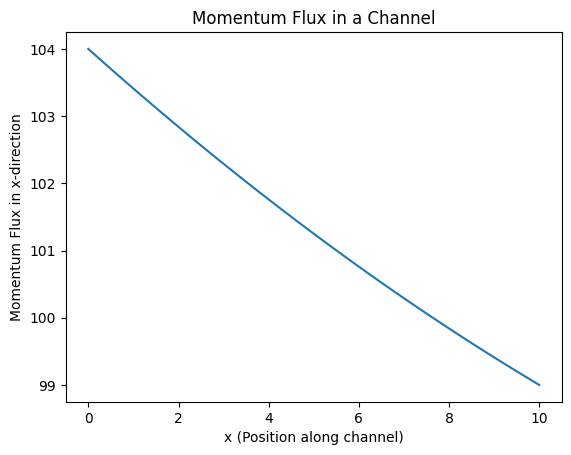

In [17]:
# Define velocity and pressure fields along a channel
x = np.linspace(0, 10, 100)
v_x = 2 + 0.1 * x  # Velocity increases along the channel
v_y = 0  # No flow in y-direction
p = 100 - x  # Pressure decreases along the channel

# Compute momentum flux in the x-direction
momentum_flux_x = rho * v_x**2 + p

# Plot momentum flux
import matplotlib.pyplot as plt
plt.plot(x, momentum_flux_x)
plt.xlabel('x (Position along channel)')
plt.ylabel('Momentum Flux in x-direction')
plt.title('Momentum Flux in a Channel')
plt.show()

### **§8. The Conservation of Circulation**

The conservation of circulation (Kelvin's theorem) states that in an ideal fluid, the circulation $\Gamma$ around a closed loop moving with the fluid is conserved:

$\frac{d\Gamma}{dt} = 0$
where circulation is:

$\Gamma = \oint_C \mathbf{v} \cdot d\mathbf{r}$

#### **Example 1: Compute Circulation in a Vortex**

In [18]:
# Define velocity field of a 2D vortex: v_theta = k / r
def velocity_vortex(r, k=1.0):
    return k / r

# Compute circulation around a circular path
r = 1.0  # Radius of the path
k = 1.0  # Vortex strength
circumference = 2 * np.pi * r
circulation = velocity_vortex(r, k) * circumference
print(f"Circulation around the vortex: {circulation:.2f}")

Circulation around the vortex: 6.28


#### **Example 2: Simulate Circulation Conservation**

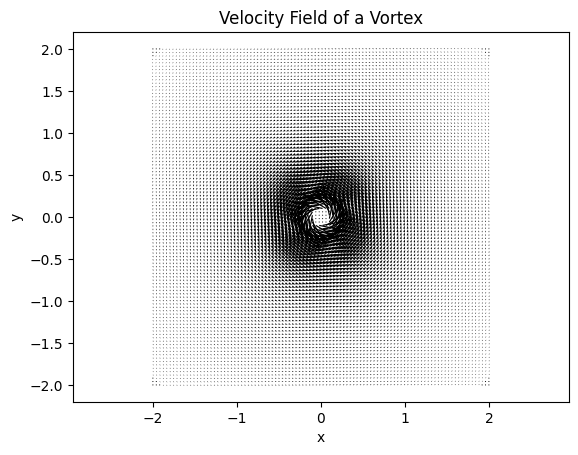

In [19]:
# Define a grid of velocity components for a vortex
x, y = np.linspace(-2, 2, 100), np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
r = np.sqrt(X**2 + Y**2)
v_theta = np.where(r > 0.1, 1 / r, 0)  # Avoid division by zero
v_x = -v_theta * Y / r  # x-component of velocity
v_y = v_theta * X / r  # y-component of velocity

# Visualize velocity field
plt.quiver(X, Y, v_x, v_y)
plt.title("Velocity Field of a Vortex")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()

### **§9. Potential Flow**

In potential flow, the velocity field is derived from a scalar potential function $\phi$:

$\mathbf{v} = \nabla \phi$

Potential flow satisfies:

$\nabla^2 \phi = 0$


#### **Example 1: Compute Velocity Field from a Potential Function**

In [ ]:
# Define potential function phi(x, y): phi = x^2 - y^2
def potential(x, y):
    return x**2 - y**2

# Compute velocity field
def velocity_from_potential(x, y):
    v_x = 2 * x  # Partial derivative w.r.t. x
    v_y = -2 * y  # Partial derivative w.r.t. y
    return v_x, v_y

# Test at a point
x, y = 1, 1
v_x, v_y = velocity_from_potential(x, y)
print(f"Velocity components: v_x={v_x}, v_y={v_y}")

#### **Example 2: Visualize Potential Flow Around a Source**

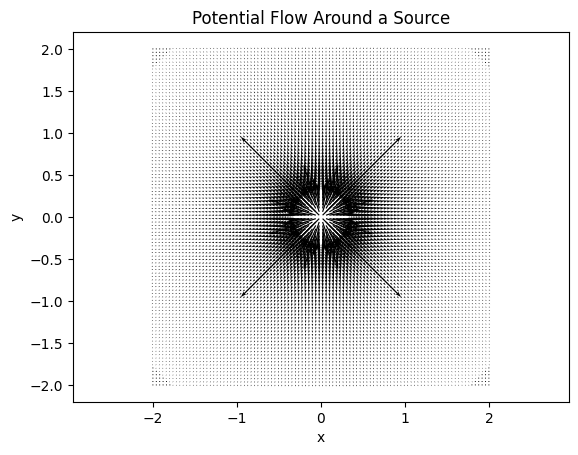

In [20]:
# Define potential function for a source: phi = (1 / (2 * pi)) * log(r)
def source_potential(x, y, strength=1.0):
    r = np.sqrt(x**2 + y**2)
    return strength * np.log(r) / (2 * np.pi)

# Compute velocity components for a source flow
def source_velocity(x, y, strength=1.0):
    r = np.sqrt(x**2 + y**2)
    v_x = strength * x / (2 * np.pi * r**2)
    v_y = strength * y / (2 * np.pi * r**2)
    return v_x, v_y

# Define a grid
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
V_X, V_Y = source_velocity(X, Y)

# Visualize velocity field
plt.quiver(X, Y, V_X, V_Y)
plt.title("Potential Flow Around a Source")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()